In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gensim import models
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# ko_model = models.fasttext.load_facebook_model('./wiki.ko.bin')
# Load the FastText model
ko_model = models.fasttext.load_facebook_model('./cc.ko.300.bin')

In [3]:
words_list =  ['네트워크 통합', '전산장비 유지보수', '정보 통신', '공급 유지보수', '빅데이터 서비스', '서비스 서비스', '연결 대상', '소프트웨어 판매', '서비스 비즈니스', '상호 변경', '네트워크 보안', '서비스 인프라', '금융 데이터', '소프트웨어 공급', '스마트카 서비스', '경쟁력 강화', '시스템 공급', '네트워크 설계', '인터넷 유해', '장비 공급', '소프트웨어 플랫폼', '컨텐츠 서비스', '가상계좌 중계서비스', '증서 보관서비스', '휴대폰 증서', '휴대폰 증서 보관서비스', '시스템 설치', '영역 확장', '대상 보유', '연결 대상 보유', '상업 총판', '판매 소프트웨어', '안정 운영', '인프라 서비스', '운영 서비스', '장비 제조', '통신사 고객', '자회사 평가', '자회사 평가 정보', '평가 정보', '시스템 통합', '산업 전반', '제조 판매', '서비스 시작', '고객 성공', '고객 성공 영역', '디지털 워크플레이스', '디지털 워크플레이스 영역', '성공 영역', '워크플레이스 영역']

# 임베딩

In [4]:
words_list

['네트워크 통합',
 '전산장비 유지보수',
 '정보 통신',
 '공급 유지보수',
 '빅데이터 서비스',
 '서비스 서비스',
 '연결 대상',
 '소프트웨어 판매',
 '서비스 비즈니스',
 '상호 변경',
 '네트워크 보안',
 '서비스 인프라',
 '금융 데이터',
 '소프트웨어 공급',
 '스마트카 서비스',
 '경쟁력 강화',
 '시스템 공급',
 '네트워크 설계',
 '인터넷 유해',
 '장비 공급',
 '소프트웨어 플랫폼',
 '컨텐츠 서비스',
 '가상계좌 중계서비스',
 '증서 보관서비스',
 '휴대폰 증서',
 '휴대폰 증서 보관서비스',
 '시스템 설치',
 '영역 확장',
 '대상 보유',
 '연결 대상 보유',
 '상업 총판',
 '판매 소프트웨어',
 '안정 운영',
 '인프라 서비스',
 '운영 서비스',
 '장비 제조',
 '통신사 고객',
 '자회사 평가',
 '자회사 평가 정보',
 '평가 정보',
 '시스템 통합',
 '산업 전반',
 '제조 판매',
 '서비스 시작',
 '고객 성공',
 '고객 성공 영역',
 '디지털 워크플레이스',
 '디지털 워크플레이스 영역',
 '성공 영역',
 '워크플레이스 영역']

In [5]:
# Words to be embedded and clustered
# Get the word embeddings
embeddings = np.array([ko_model.wv[word] for word in words_list])

In [6]:
embeddings.shape

(50, 300)

In [7]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# t-sne, KMeans

/Users/leewonseok/anaconda3/envs/vvv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


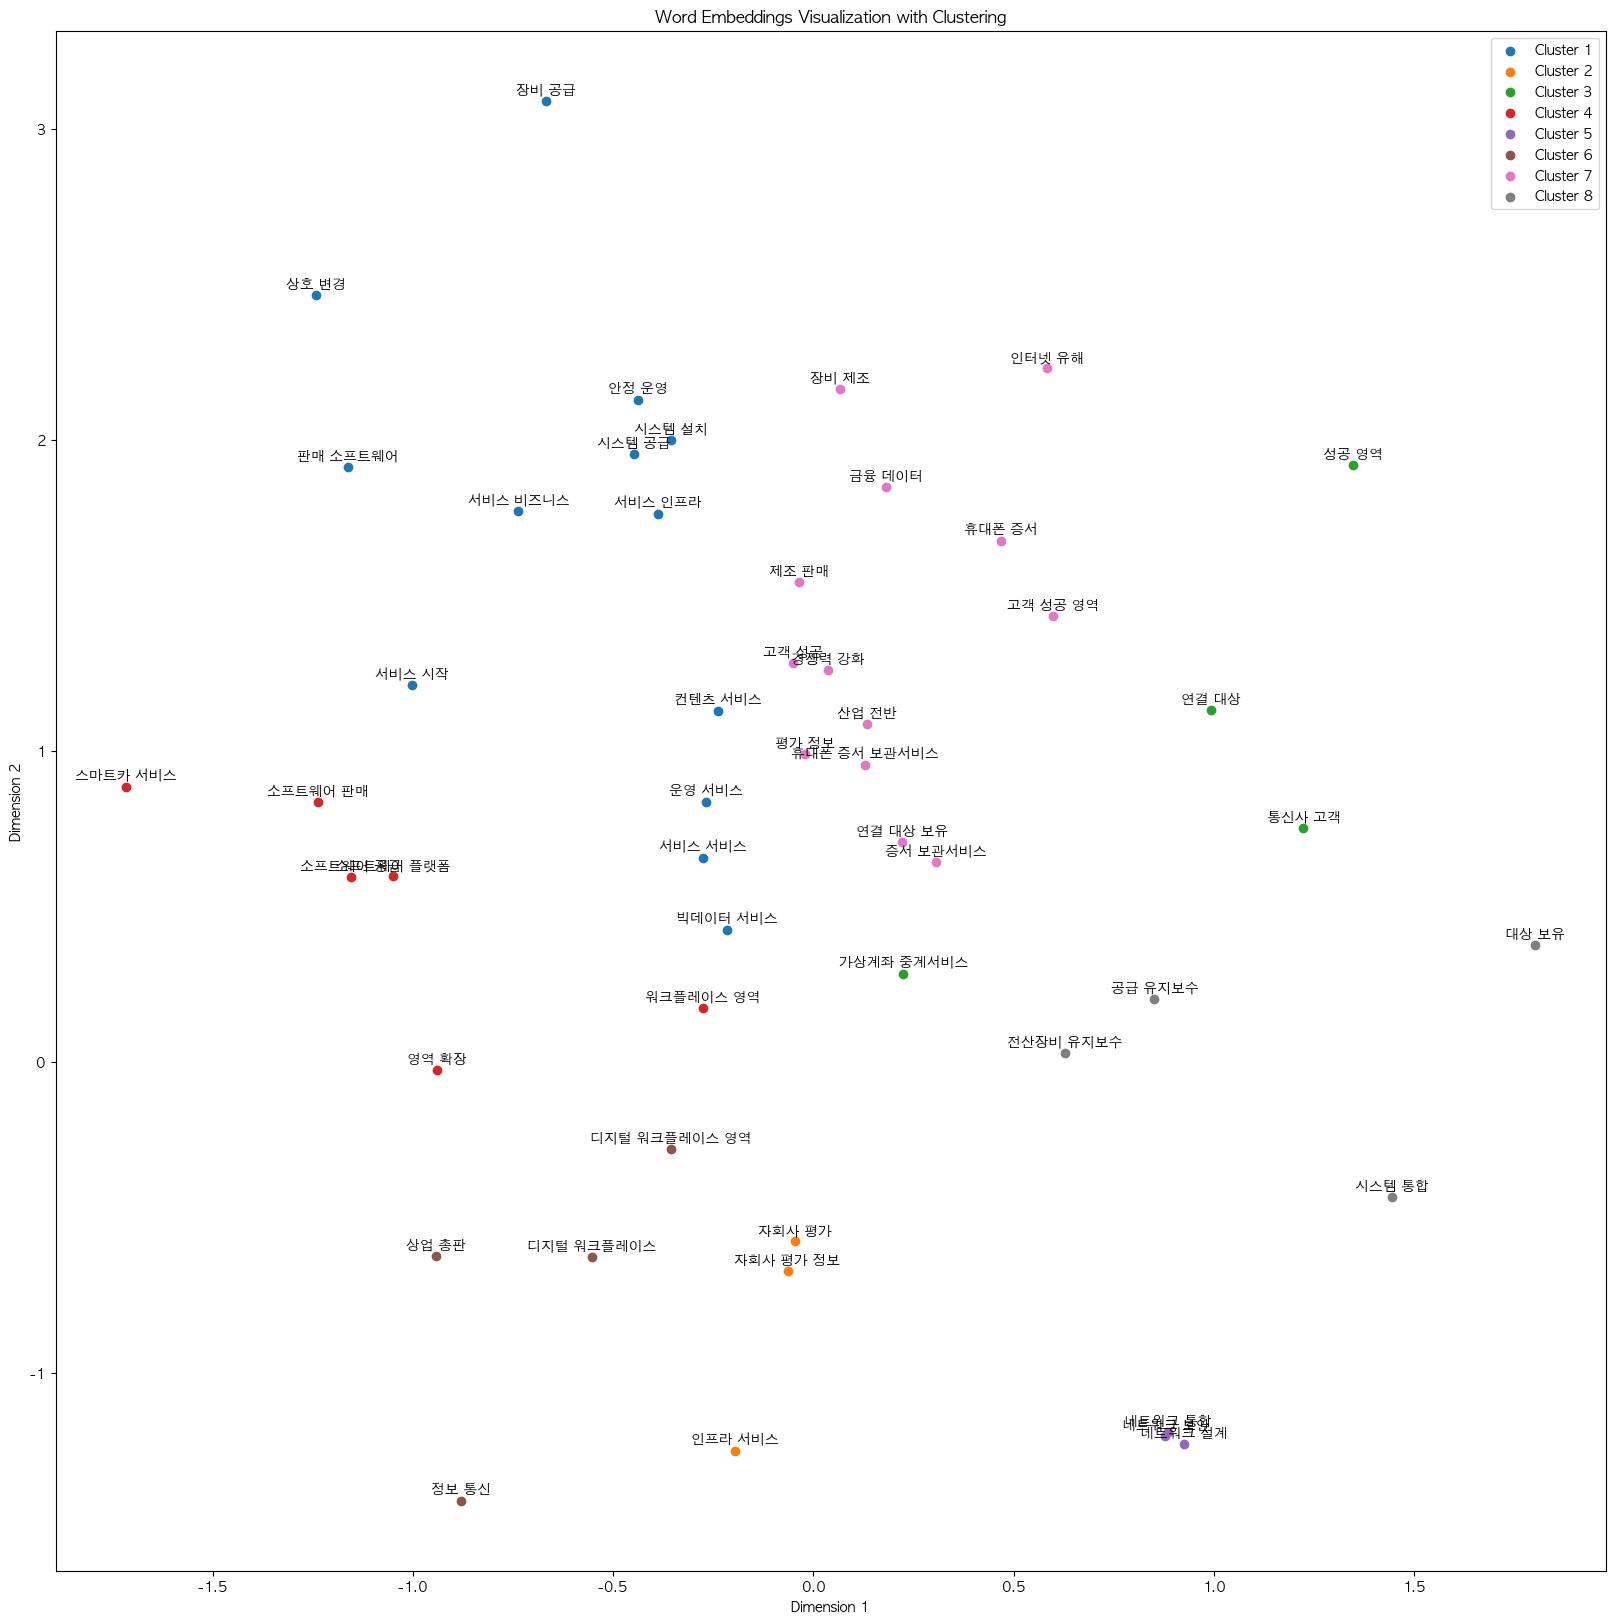

Cluster 1: ['빅데이터 서비스', '서비스 서비스', '서비스 비즈니스', '상호 변경', '서비스 인프라', '시스템 공급', '장비 공급', '컨텐츠 서비스', '시스템 설치', '판매 소프트웨어', '안정 운영', '운영 서비스', '서비스 시작']
Cluster 2: ['인프라 서비스', '자회사 평가', '자회사 평가 정보']
Cluster 3: ['연결 대상', '가상계좌 중계서비스', '통신사 고객', '성공 영역']
Cluster 4: ['소프트웨어 판매', '소프트웨어 공급', '스마트카 서비스', '소프트웨어 플랫폼', '영역 확장', '워크플레이스 영역']
Cluster 5: ['네트워크 통합', '네트워크 보안', '네트워크 설계']
Cluster 6: ['정보 통신', '상업 총판', '디지털 워크플레이스', '디지털 워크플레이스 영역']
Cluster 7: ['금융 데이터', '경쟁력 강화', '인터넷 유해', '증서 보관서비스', '휴대폰 증서', '휴대폰 증서 보관서비스', '연결 대상 보유', '장비 제조', '평가 정보', '산업 전반', '제조 판매', '고객 성공', '고객 성공 영역']
Cluster 8: ['전산장비 유지보수', '공급 유지보수', '대상 보유', '시스템 통합']


In [8]:
# Assuming you have obtained the embeddings and words before this point
# embeddings = ...
# words = ...
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(embeddings_2d)

# Perform clustering using KMeans
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(cosine_sim)

# Create a dictionary to store clustered words
clustered_words = {i: [] for i in range(num_clusters)}

# Populate the dictionary with words in each cluster
for i, word in enumerate(words_list):
    cluster_idx = cluster_labels[i]
    clustered_words[cluster_idx].append(word)

# Visualize the clustered embeddings and annotate words
plt.figure(figsize=(20, 20))
for i in range(num_clusters):
    x = embeddings_2d[cluster_labels == i, 0]
    y = embeddings_2d[cluster_labels == i, 1]
    plt.scatter(x, y, label=f'Cluster {i+1}')

    for word in clustered_words[i]:
        idx = words_list.index(word)
        plt.annotate(word, (embeddings_2d[idx, 0], embeddings_2d[idx, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Word Embeddings Visualization with Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# Print the words in each cluster
for i in range(num_clusters):
    print(f"Cluster {i+1}: {clustered_words[i]}")


# HDBSCAN

/Users/leewonseok/anaconda3/envs/vvv/lib/python3.8/site-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


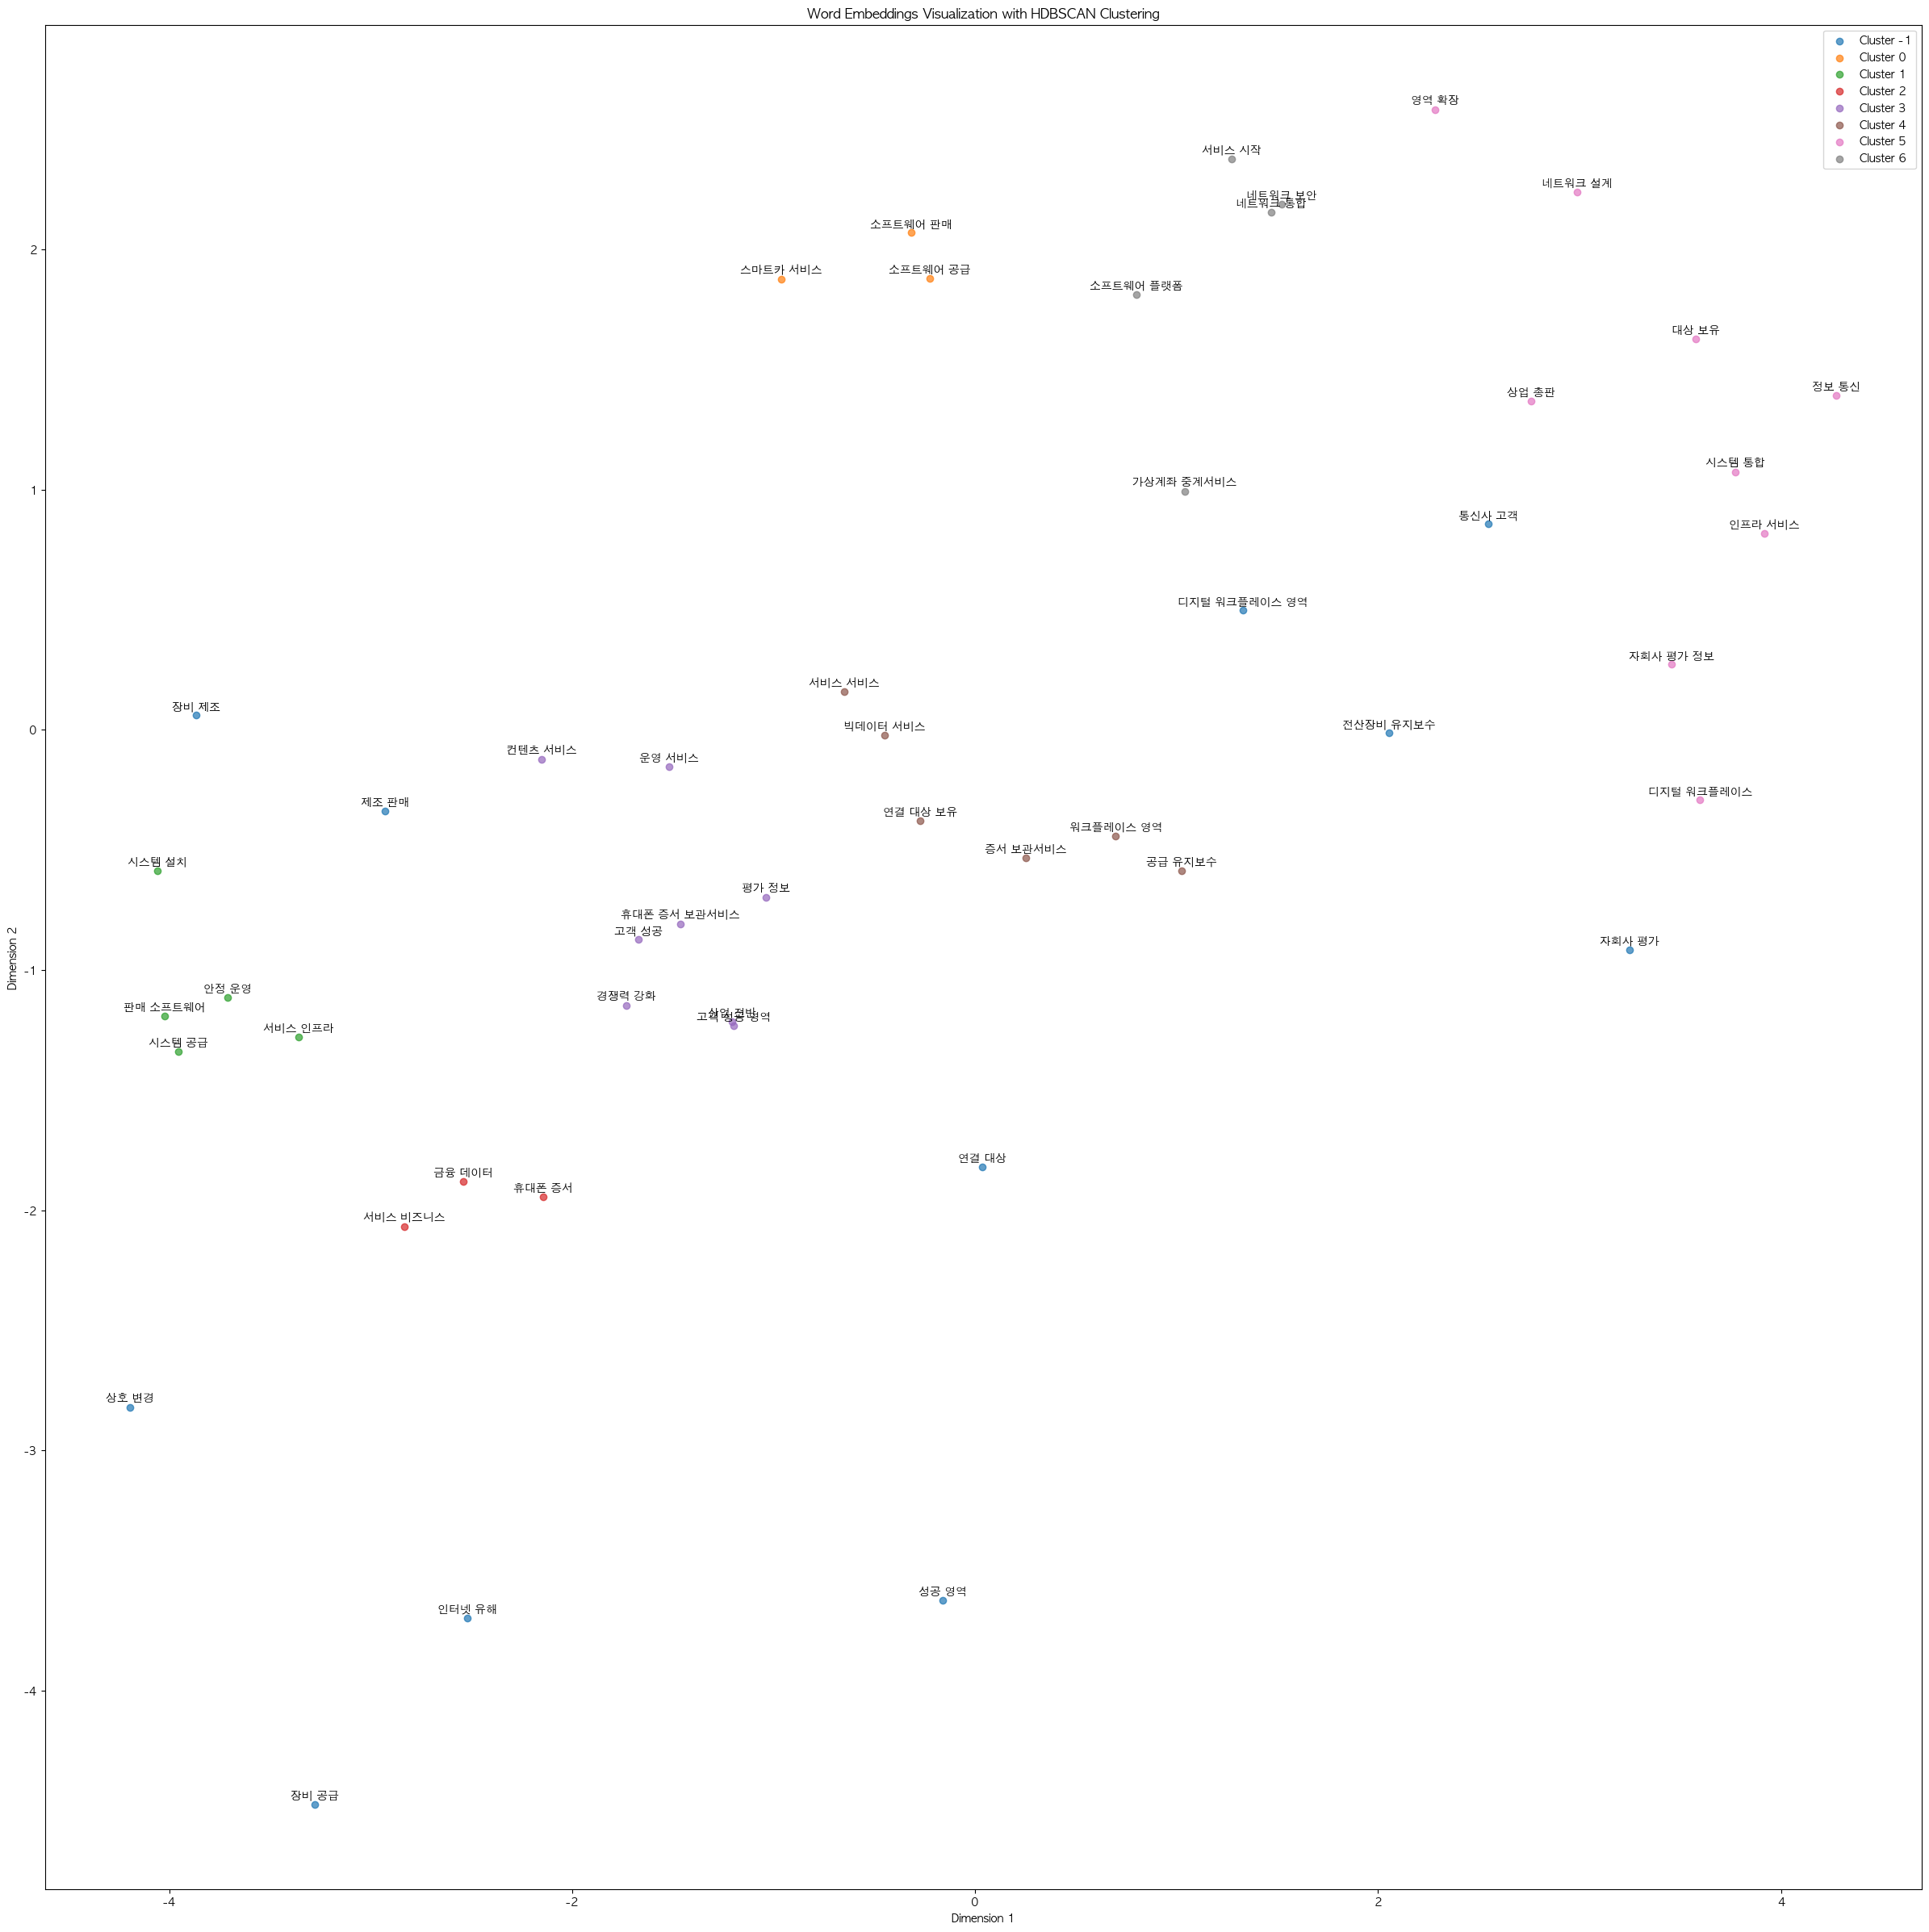

Cluster -1: ['전산장비 유지보수', '연결 대상', '상호 변경', '인터넷 유해', '장비 공급', '장비 제조', '통신사 고객', '자회사 평가', '제조 판매', '디지털 워크플레이스 영역', '성공 영역']
Cluster 0: ['소프트웨어 판매', '소프트웨어 공급', '스마트카 서비스']
Cluster 1: ['서비스 인프라', '시스템 공급', '시스템 설치', '판매 소프트웨어', '안정 운영']
Cluster 2: ['서비스 비즈니스', '금융 데이터', '휴대폰 증서']
Cluster 3: ['경쟁력 강화', '컨텐츠 서비스', '휴대폰 증서 보관서비스', '운영 서비스', '평가 정보', '산업 전반', '고객 성공', '고객 성공 영역']
Cluster 4: ['공급 유지보수', '빅데이터 서비스', '서비스 서비스', '증서 보관서비스', '연결 대상 보유', '워크플레이스 영역']
Cluster 5: ['정보 통신', '네트워크 설계', '영역 확장', '대상 보유', '상업 총판', '인프라 서비스', '자회사 평가 정보', '시스템 통합', '디지털 워크플레이스']
Cluster 6: ['네트워크 통합', '네트워크 보안', '소프트웨어 플랫폼', '가상계좌 중계서비스', '서비스 시작']


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
import pacmap

# t-SNE 모델 설정
pac = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=42) 
pac_embeddings = pac.fit_transform(embeddings, init="pca")

# HDBSCAN 모델 설정
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)

# HDBSCAN을 사용하여 클러스터링
hdbscan_labels = hdbscan_model.fit_predict(pac_embeddings)

# Visualize the clustered embeddings and store the coordinates
plt.figure(figsize=(30, 30))
for cluster_id in np.unique(hdbscan_labels):
    x = pac_embeddings[hdbscan_labels == cluster_id, 0]
    y = pac_embeddings[hdbscan_labels == cluster_id, 1]
    plt.scatter(x, y, label=f'Cluster {cluster_id}', alpha=0.7)

for i, word in enumerate(words_list):
    plt.annotate(word, (pac_embeddings[i, 0], pac_embeddings[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Word Embeddings Visualization with HDBSCAN Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# 클러스터별로 단어 리스트 저장
cluster_word_lists = {}
for cluster_id in np.unique(hdbscan_labels):
    cluster_words = [word for i, word in enumerate(words_list) if hdbscan_labels[i] == cluster_id]
    cluster_word_lists[f'Cluster {cluster_id}'] = cluster_words
    print(f'Cluster {cluster_id}: {cluster_words}')


# DBSCAN

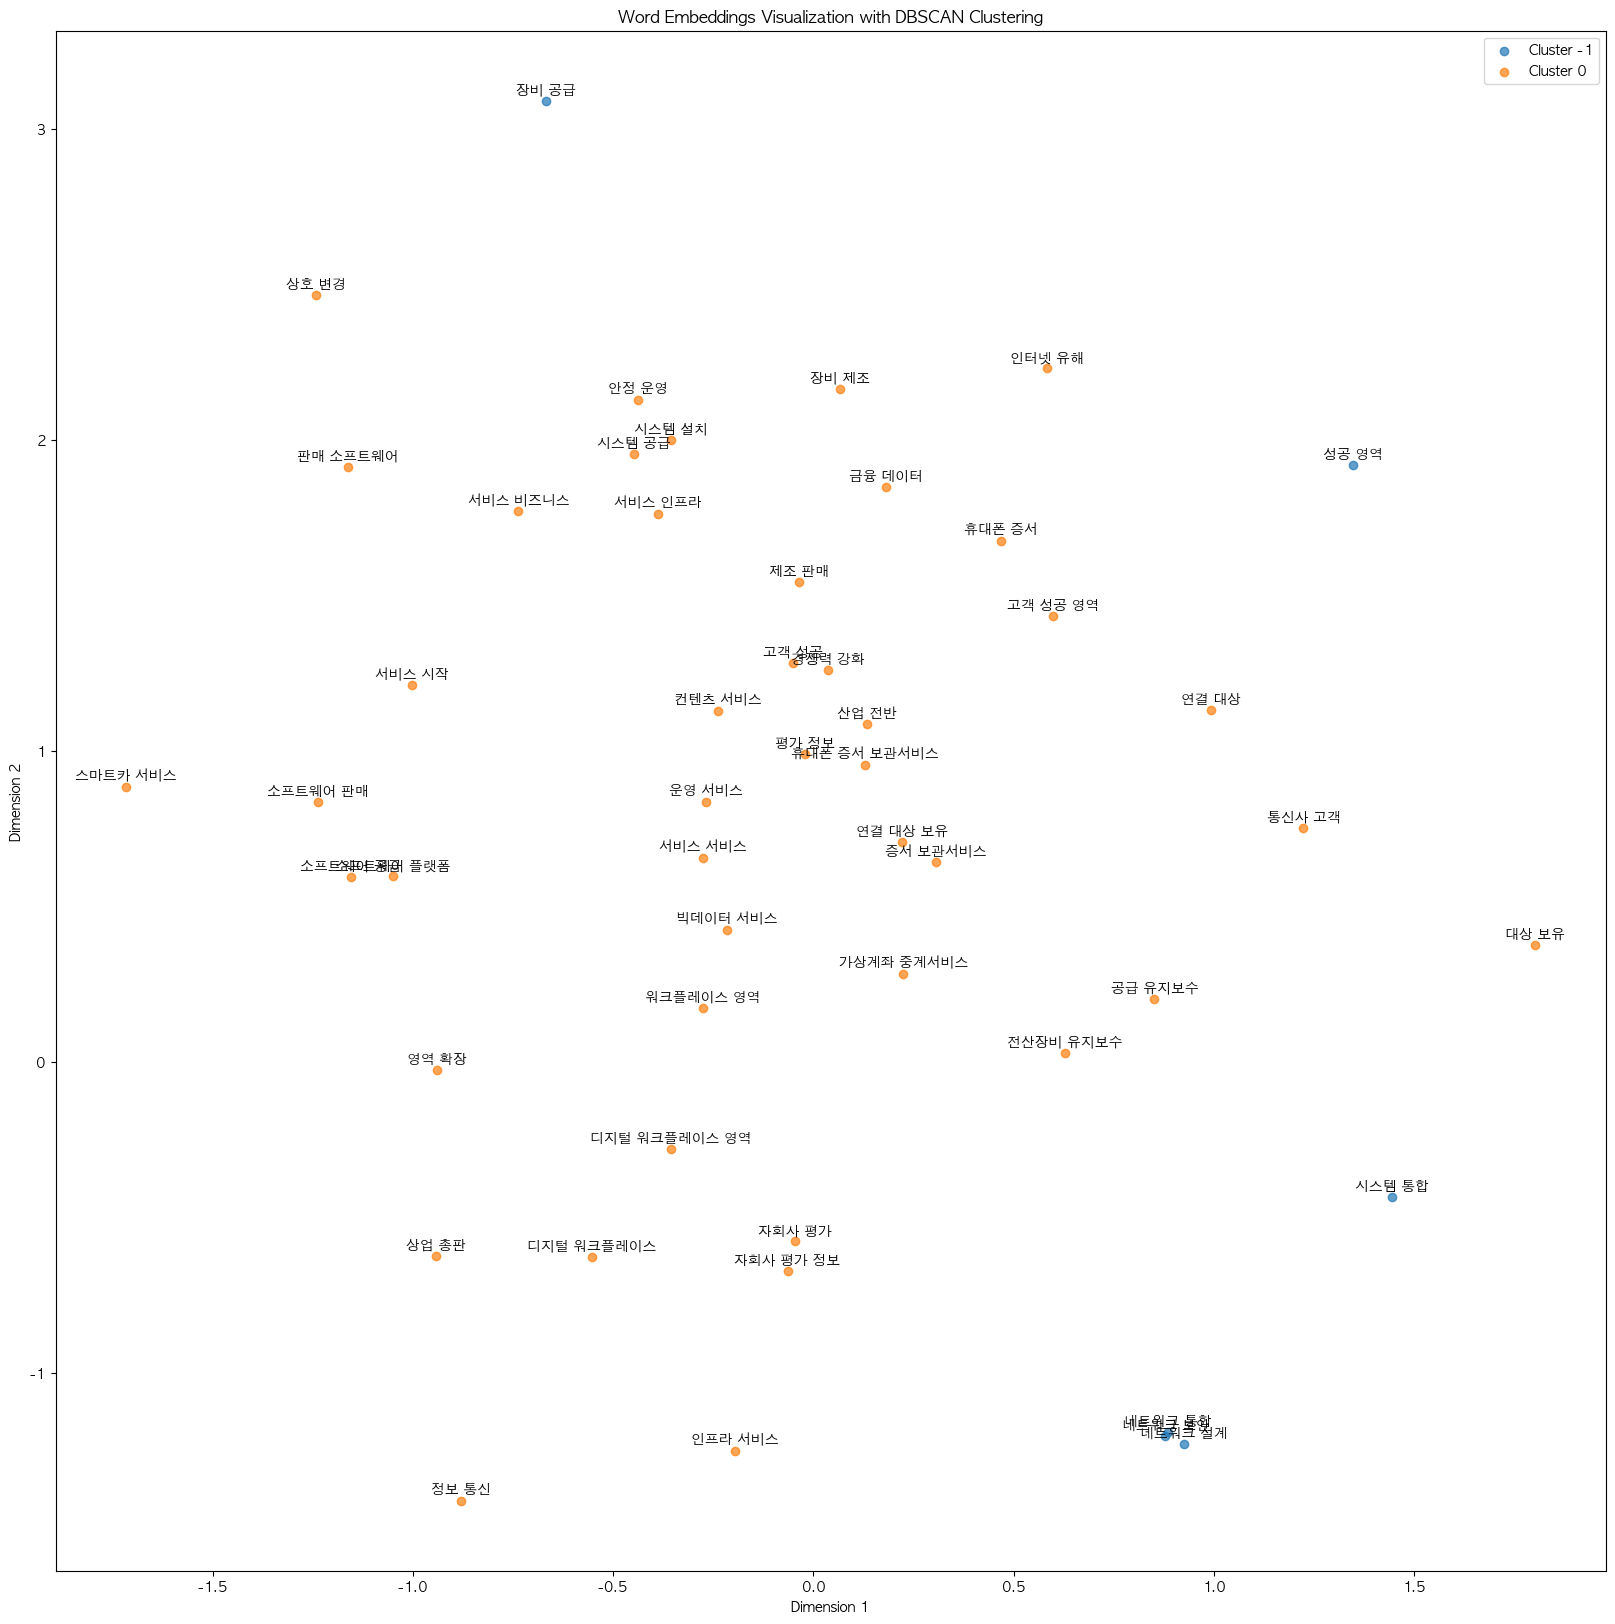

Cluster -1: ['네트워크 통합', '네트워크 보안', '네트워크 설계', '장비 공급', '시스템 통합', '성공 영역']
Cluster 0: ['전산장비 유지보수', '정보 통신', '공급 유지보수', '빅데이터 서비스', '서비스 서비스', '연결 대상', '소프트웨어 판매', '서비스 비즈니스', '상호 변경', '서비스 인프라', '금융 데이터', '소프트웨어 공급', '스마트카 서비스', '경쟁력 강화', '시스템 공급', '인터넷 유해', '소프트웨어 플랫폼', '컨텐츠 서비스', '가상계좌 중계서비스', '증서 보관서비스', '휴대폰 증서', '휴대폰 증서 보관서비스', '시스템 설치', '영역 확장', '대상 보유', '연결 대상 보유', '상업 총판', '판매 소프트웨어', '안정 운영', '인프라 서비스', '운영 서비스', '장비 제조', '통신사 고객', '자회사 평가', '자회사 평가 정보', '평가 정보', '산업 전반', '제조 판매', '서비스 시작', '고객 성공', '고객 성공 영역', '디지털 워크플레이스', '디지털 워크플레이스 영역', '워크플레이스 영역']


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

# Assume you have obtained embeddings and words
# embeddings = ...
# words = ...

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Perform DBSCAN clustering
dbscan_model = DBSCAN(eps=0.76, min_samples=4)
cluster_labels = dbscan_model.fit_predict(embeddings_2d)

# Create a dictionary to store clustered words
clustered_words = {i: [] for i in np.unique(cluster_labels)}

# Populate the dictionary with words in each cluster
for i, word in enumerate(words_list):
    cluster_idx = cluster_labels[i]
    clustered_words[cluster_idx].append(word)

# Visualize the clustered embeddings and annotate words
plt.figure(figsize=(20, 20))
for cluster_idx in clustered_words:
    x = embeddings_2d[cluster_labels == cluster_idx, 0]
    y = embeddings_2d[cluster_labels == cluster_idx, 1]
    plt.scatter(x, y, label=f'Cluster {cluster_idx}', alpha=0.7)

    for word in clustered_words[cluster_idx]:
        idx = words_list.index(word)
        plt.annotate(word, (embeddings_2d[idx, 0], embeddings_2d[idx, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Word Embeddings Visualization with DBSCAN Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

# Print the words in each cluster
for cluster_idx in clustered_words:
    print(f"Cluster {cluster_idx}: {clustered_words[cluster_idx]}")
